<a href="https://colab.research.google.com/github/SHIBU-69/Labreport_/blob/main/222002061_CSE312_222D3_LabReport02_knnFromScratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Step 1: Import Libraries

In [ ]:
import numpy as np
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

# Scikit-learn imports for comparison and utility
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

### Step 2: Implement KNN Algorithm from Scratch

In [ ]:
def euclidean_distance(x1, x2):
    """Calculates the Euclidean distance between two vectors."""
    return np.sqrt(np.sum((x1 - x2) ** 2))

class KNN:
    """
    K-Nearest Neighbors classifier implemented from scratch.
    """
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        """Stores the training data."""
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        """Predicts labels for a given set of test data."""
        y_pred = [self._predict_single(x) for x in X]
        return np.array(y_pred)

    def _predict_single(self, x):
        """Helper function to predict a single data point."""
        # Compute distances
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]

        # Get k-nearest samples, labels
        k_indices = np.argsort(distances)[:self.k]
        k_neighbor_labels = [self.y_train[i] for i in k_indices]

        # Majority vote
        most_common = Counter(k_neighbor_labels).most_common(1)
        return most_common[0][0]

### Step 3: Implement Custom Evaluation Metrics from Scratch

In [ ]:
def accuracy(y_true, y_pred):
    """Calculates accuracy."""
    return np.sum(y_true == y_pred) / len(y_true)

def confusion_matrix(y_true, y_pred, pos_label=1, neg_label=0):
    """
    Computes the confusion matrix for binary classification.
    Returns a dictionary with TP, FP, TN, FN.
    """
    tp = np.sum((y_pred == pos_label) & (y_true == pos_label))
    fp = np.sum((y_pred == pos_label) & (y_true == neg_label))
    tn = np.sum((y_pred == neg_label) & (y_true == neg_label))
    fn = np.sum((y_pred == neg_label) & (y_true == pos_label))
    return {'TP': tp, 'FP': fp, 'TN': tn, 'FN': fn}

def precision(conf_matrix):
    """Calculates precision from a confusion matrix dictionary."""
    tp = conf_matrix['TP']
    fp = conf_matrix['FP']
    return tp / (tp + fp) if (tp + fp) > 0 else 0

def recall(conf_matrix):
    """Calculates recall from a confusion matrix dictionary."""
    tp = conf_matrix['TP']
    fn = conf_matrix['FN']
    return tp / (tp + fn) if (tp + fn) > 0 else 0

def f1_score(precision_val, recall_val):
    """Calculates F1-score from precision and recall values."""
    return 2 * (precision_val * recall_val) / (precision_val + recall_val) if (precision_val + recall_val) > 0 else 0

def print_metrics(y_true, y_pred, model_name="Model"):
    """Calculates and prints all evaluation metrics."""
    print(f"--- {model_name} Evaluation ---")
    acc = accuracy(y_true, y_pred)
    conf_matrix = confusion_matrix(y_true, y_pred)
    prec = precision(conf_matrix)
    rec = recall(conf_matrix)
    f1 = f1_score(prec, rec)

    print(f"Accuracy: {acc:.4f}")
    print(f"Confusion Matrix: {conf_matrix}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print("-" * (len(model_name) + 22))
    return acc, conf_matrix, prec, rec, f1

### Step 4: Load and Preprocess the Dataset

1.  **Load Data**: Read the `KNNAlgorithmDataset.csv` file you uploaded to Colab.
2.  **Clean Data**: Remove unnecessary `id` and `Unnamed: 32` columns.
3.  **Encode Target**: Convert the categorical 'diagnosis' column ('M', 'B') into numerical labels (1 for Malignant, 0 for Benign).
4.  **Scale Features**: Standardize features using `StandardScaler`.

In [ ]:
try:
    df = pd.read_csv('KNNAlgorithmDataset.csv')
    print("Successfully loaded KNNAlgorithmDataset.csv")
except FileNotFoundError:
    print("ERROR: 'KNNAlgorithmDataset.csv' not found. Please upload the file to the Colab session.")
    # Stop execution if file is not found
    exit()

# Clean the data
if 'Unnamed: 32' in df.columns:
    df = df.drop(columns=['id', 'Unnamed: 32'])
else:
    df = df.drop(columns=['id'])

# Encode the target variable 'diagnosis'
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

# Separate features (X) and target (y)
X = df.drop(columns=['diagnosis']).values
y = df['diagnosis'].values

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("\nData preprocessing complete.")
print(f"Shape of feature data: {X_scaled.shape}")
print(f"Target distribution: {Counter(y)}")
df.head()

Successfully loaded KNNAlgorithmDataset.csv

Data preprocessing complete.
Shape of feature data: (569, 30)
Target distribution: Counter({np.int64(0): 357, np.int64(1): 212})


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Step 5: Find the Optimal k Value

--- Finding Optimal k ---
Optimal k value found: 9 with an accuracy of 0.9649


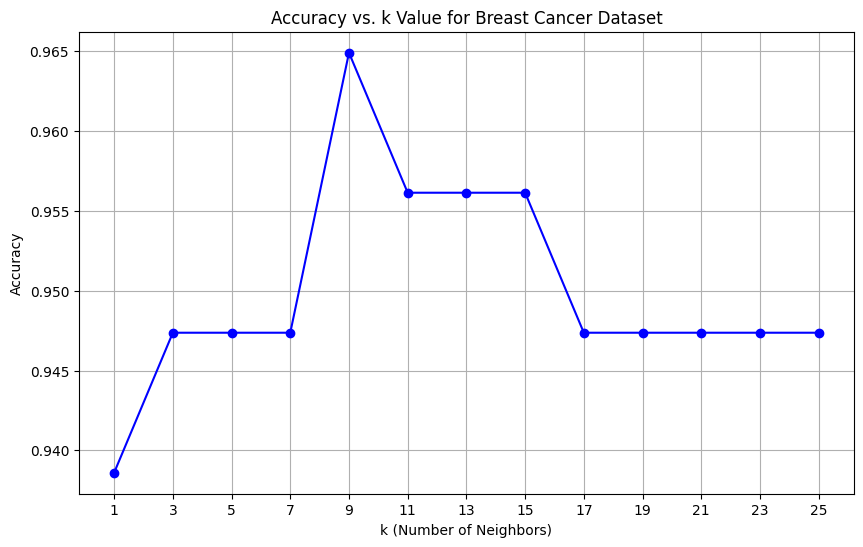

In [ ]:
print("--- Finding Optimal k ---")
X_train_k, X_test_k, y_train_k, y_test_k = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

k_values = range(1, 26, 2)  # Check odd k's to avoid ties
accuracies_k = []

for k in k_values:
    model = KNN(k=k)
    model.fit(X_train_k, y_train_k)
    predictions = model.predict(X_test_k)
    acc = accuracy(y_test_k, predictions)
    accuracies_k.append(acc)

# Find the best k
best_k = k_values[np.argmax(accuracies_k)]
print(f"Optimal k value found: {best_k} with an accuracy of {max(accuracies_k):.4f}")

# Plotting Accuracy vs. k
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies_k, marker='o', linestyle='-', color='b')
plt.title('Accuracy vs. k Value for Breast Cancer Dataset')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()

### Step 6: Find the Optimal Split Ratio

In [ ]:
print("\n--- Finding Optimal Split Ratio ---")
test_sizes = [0.2, 0.25, 0.3, 0.35, 0.4]
accuracies_split = []

for size in test_sizes:
    X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_scaled, y, test_size=size, random_state=42)
    model = KNN(k=best_k)
    model.fit(X_train_s, y_train_s)
    predictions = model.predict(X_test_s)
    acc = accuracy(y_test_s, predictions)
    accuracies_split.append(acc)
    print(f"Test Size: {size*100:.0f}% -> Accuracy: {acc:.4f}")

best_test_size = test_sizes[np.argmax(accuracies_split)]
print(f"\nOptimal Test Size found: {best_test_size*100:.0f}% (Train/Test Split: {100-best_test_size*100:.0f}/{best_test_size*100:.0f})")


--- Finding Optimal Split Ratio ---
Test Size: 20% -> Accuracy: 0.9649
Test Size: 25% -> Accuracy: 0.9720
Test Size: 30% -> Accuracy: 0.9708
Test Size: 35% -> Accuracy: 0.9650
Test Size: 40% -> Accuracy: 0.9693

Optimal Test Size found: 25% (Train/Test Split: 75/25)


### Step 7: Final Comparison with Scikit-learn

In [ ]:
print("\n--- Comparing Custom KNN with Scikit-learn KNN ---")
print(f"Using optimal k={best_k} and test size={best_test_size*100:.0f}%")

# Split the data using the optimal parameters
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=best_test_size, random_state=42
)

# 1. My Custom KNN Model
my_knn = KNN(k=best_k)
my_knn.fit(X_train, y_train)
my_predictions = my_knn.predict(X_test)
print_metrics(y_test, my_predictions, "Custom KNN")

# 2. Scikit-learn's KNN Model
sklearn_knn = KNeighborsClassifier(n_neighbors=best_k)
sklearn_knn.fit(X_train, y_train)
sklearn_predictions = sklearn_knn.predict(X_test)

# Evaluate scikit-learn model using my custom metrics to ensure a fair comparison
print_metrics(y_test, sklearn_predictions, "Scikit-learn KNN")


--- Comparing Custom KNN with Scikit-learn KNN ---
Using optimal k=9 and test size=25%
--- Custom KNN Evaluation ---
Accuracy: 0.9720
Confusion Matrix: {'TP': np.int64(52), 'FP': np.int64(2), 'TN': np.int64(87), 'FN': np.int64(2)}
Precision: 0.9630
Recall: 0.9630
F1-Score: 0.9630
--------------------------------
--- Scikit-learn KNN Evaluation ---
Accuracy: 0.9720
Confusion Matrix: {'TP': np.int64(52), 'FP': np.int64(2), 'TN': np.int64(87), 'FN': np.int64(2)}
Precision: 0.9630
Recall: 0.9630
F1-Score: 0.9630
--------------------------------------


(np.float64(0.972027972027972),
 {'TP': np.int64(52),
  'FP': np.int64(2),
  'TN': np.int64(87),
  'FN': np.int64(2)},
 np.float64(0.9629629629629629),
 np.float64(0.9629629629629629),
 np.float64(0.9629629629629629))